## Required Libraries

In [22]:
# Necessary libraries (uncomment the first line if they are not installed)
# !pip install pandas numpy matplotlib seaborn nltk langdetect openpyxl

import pandas as pd # Import Pandas library for data manipulation and analysis
import numpy as np # Import NumPy library for numerical operations and matrix management
import matplotlib.pyplot as plt # Import Matplotlib's pyplot interface for data visualization
import seaborn as sns # Import Seaborn for advanced statistical data visualization

import warnings # Import the warnings library to handle warning messages
warnings.filterwarnings("ignore") # Filter out (ignore) warning messages to keep the output clean

## Data Reading

In [23]:
# Read the CSV file into a DataFrame
# low_memory=False: Tells Pandas to read the file all at once instead of in chunks, preventing warnings about mixed data types
df = pd.read_csv("../notebooks/patentAI.csv", low_memory=False)

# Print the dimensions of the dataset (number of rows, number of columns)
print("Veri boyutu:", df.shape)

# Display general information about the DataFrame, such as data types, non-null counts, and memory usage
df.info()

Veri boyutu: (18759, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18759 entries, 0 to 18758
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patent_id            18759 non-null  object 
 1   title                18759 non-null  object 
 2   assignee             18759 non-null  object 
 3   inventor_author      18759 non-null  object 
 4   priority_date        18759 non-null  object 
 5   filing_date          18759 non-null  object 
 6   publication_date     18759 non-null  object 
 7   grant_date           18759 non-null  object 
 8   result_link          18759 non-null  object 
 9   image_link           18759 non-null  object 
 10  language             18759 non-null  object 
 11  technology_category  18759 non-null  object 
 12  publication_year     18759 non-null  float64
 13  filing_year          18759 non-null  float64
dtypes: float64(2), object(12)
memory usage: 2.0+ MB


## Loss and Duplicate Value

In [24]:
# Create a Series showing the total count of missing (NaN) values for each column, sorted from highest to lowest
missing = df.isna().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column (count / total rows * 100), rounded to 2 decimal places
missing_pct = (missing / len(df) * 100).round(2)

# Create a summary DataFrame to neatly display both the count and percentage of missing values
missing_table = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
})

# Display only the columns that actually have missing values (count > 0)
display(missing_table[missing_table["missing_count"] > 0])

# Calculate the total number of duplicate rows in the dataset
dup_count = df.duplicated().sum()

# Print the number of duplicate records found
print(f"Duplicate kayıt sayısı: {dup_count}")

,missing_count,missing_pct


Duplicate kayıt sayısı: 0


In [25]:
# Print a header label to indicate that the list of column names follows
print("Sütunlar:")

# Convert the DataFrame's column index object into a list and print it to see all available features
print(list(df.columns))

# Check if the column named "title" exists within the DataFrame's columns to avoid errors
if "title" in df.columns:
    # Display the first 10 entries of the "title" column to inspect sample data
    display(df["title"].head(10))
else:
    # Execute this block if the "title" column is not found in the DataFrame
    # Print a warning message suggesting to check for alternative column names (like 'patent_title') if 'title' is missing
    print("title sütunu yoksa hangi sütun başlıkları içeriyor belirt (ör: 'patent_title' vs.)")

Sütunlar:
['patent_id', 'title', 'assignee', 'inventor_author', 'priority_date', 'filing_date', 'publication_date', 'grant_date', 'result_link', 'image_link', 'language', 'technology_category', 'publication_year', 'filing_year']


0    Touch screen device, method and graphic user i...
1    Data object store and server for a cloud stora...
2                     Intelligent Automated Assistant 
3    Soybean event MON89788 and methods for detecti...
4    System and method for providing network suppor...
5    Processing anomaly data to identify network se...
6                       Personal monitoring apparatus 
7    Unlocking a device by performing gestures on a...
8    Surgical instrument having force feedback capa...
9                                      Display device 
Name: title, dtype: object

In [26]:
# Calculate the total number of missing (NaN) values for each column and sort them in descending order (highest to lowest)
missing = df.isna().sum().sort_values(ascending=False)

# Calculate the percentage of missing values relative to the total number of rows, rounded to 2 decimal places
missing_pct = (missing / len(df) * 100).round(2)

# Create a summary DataFrame to store both the count and percentage of missing data for better readability
missing_table = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
})

# Filter and select only the rows in the summary table where the missing count is greater than 0
# (Note: In Jupyter, this line displays the table; in a script, you would need to wrap it in print() or display())
missing_table[missing_table["missing_count"] > 0]

# Print the Series containing the count of missing values for all columns
print(f"Kayıp değer sayısı: {missing}")

Kayıp değer sayısı: patent_id              0
title                  0
assignee               0
inventor_author        0
priority_date          0
filing_date            0
publication_date       0
grant_date             0
result_link            0
image_link             0
language               0
technology_category    0
publication_year       0
filing_year            0
dtype: int64


## Language Distribution

,count,percentage
language,,
english,14083,75.07
unknown,3950,21.06
turkish,726,3.87


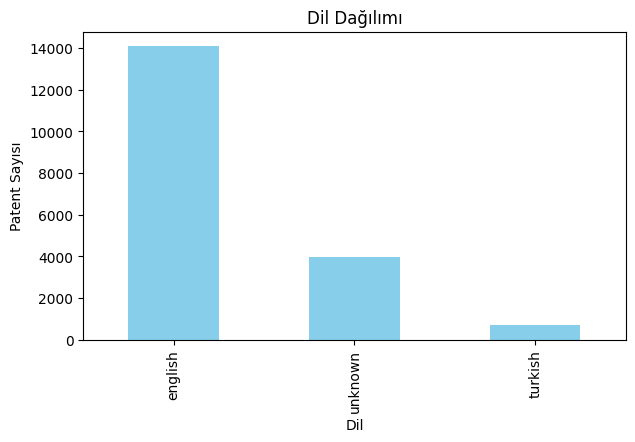

In [27]:
# Calculate the frequency (count) of each unique language in the 'language' column
lang_counts = df['language'].value_counts()

# Calculate the percentage of each language relative to the total dataset size, rounded to 2 decimal places
lang_pct = (lang_counts / len(df) * 100).round(2)

# Create a summary DataFrame to display both the raw counts and the percentages side-by-side
lang_summary = pd.DataFrame({
    'count': lang_counts,          # Column for the count of patents per language
    'percentage': lang_pct         # Column for the percentage share of each language
})

# Display the summary table (useful in Jupyter Notebook environments)
display(lang_summary)

# --- Visualization ---

# Import the Matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Create a figure (canvas) with a specific size (7 inches wide, 4 inches tall)
plt.figure(figsize=(7,4))

# Plot the language counts as a bar chart with 'skyblue' color
lang_counts.plot(kind='bar', color='skyblue')

# Set the title of the chart to 'Dil Dağılımı' (Language Distribution)
plt.title('Dil Dağılımı')

# Label the x-axis as 'Dil' (Language)
plt.xlabel('Dil')

# Label the y-axis as 'Patent Sayısı' (Number of Patents)
plt.ylabel('Patent Sayısı')

# Render and display the generated plot
plt.show()

## Patent Distribution by Year

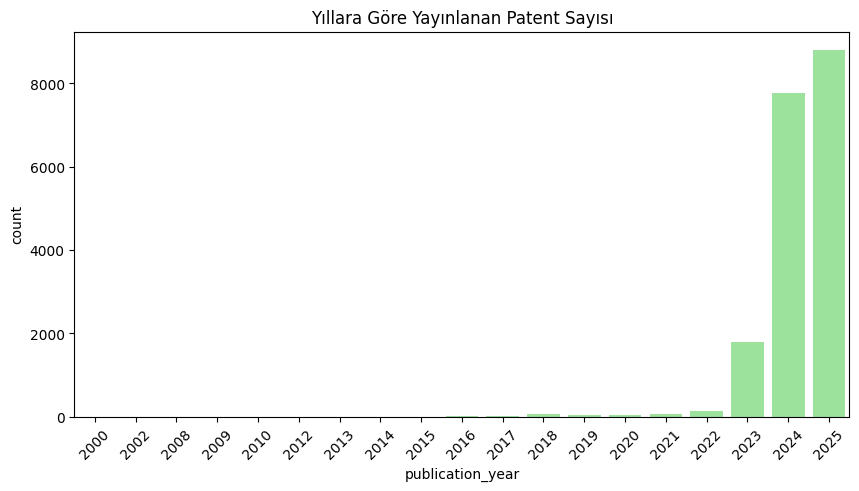

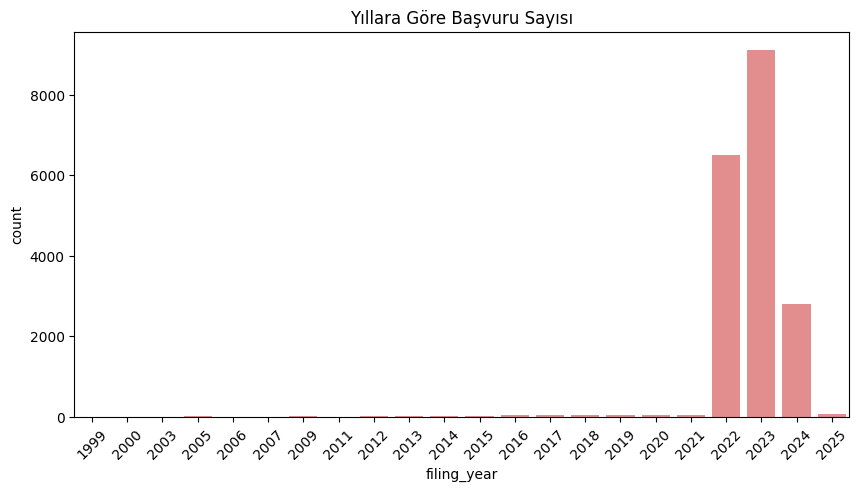

In [28]:
# Define a list containing the names of the year-related columns to be processed
year_columns = ["publication_year", "filing_year"]

# Loop through each column name in the list
for col in year_columns:
    # Convert the column to float first (to handle decimals), round to the nearest whole number,
    # then convert to "Int64" (a Pandas nullable integer type that allows missing values, unlike standard 'int')
    df[col] = df[col].astype(float).round().astype("Int64")

# --- Plotting Publication Year ---

# Create a new figure (canvas) with a specific size (width=10 inches, height=5 inches)
plt.figure(figsize=(10,5))

# Create a count plot (bar chart) using Seaborn to show the frequency of patents for each 'publication_year'
# color='lightgreen': Sets the visual color of the bars
sns.countplot(data=df, x='publication_year', color='lightgreen')

# Set the main title of the chart
plt.title('Yıllara Göre Yayınlanan Patent Sayısı')

# Rotate the x-axis labels (years) by 45 degrees to prevent them from overlapping and ensure readability
plt.xticks(rotation=45)

# Render and display the plot
plt.show()

# --- Plotting Filing Year ---

# Create another figure for the second plot with the same dimensions
plt.figure(figsize=(10,5))

# Create a count plot for 'filing_year' using a different color ('lightcoral') to distinguish it from the previous chart
sns.countplot(data=df, x='filing_year', color='lightcoral')

# Set the title for the filing year chart
plt.title('Yıllara Göre Başvuru Sayısı')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the second plot
plt.show()

## Title Length Analysis

Karakter uzunluğu istatistikleri:
count    18759.000000
mean        60.368463
std         30.818546
min          5.000000
25%         39.000000
50%         55.000000
75%         77.000000
max        315.000000
Name: title_length_chars, dtype: float64

Kelime sayısı istatistikleri:
count    18759.000000
mean         7.908097
std          4.275171
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         45.000000
Name: title_length_words, dtype: float64


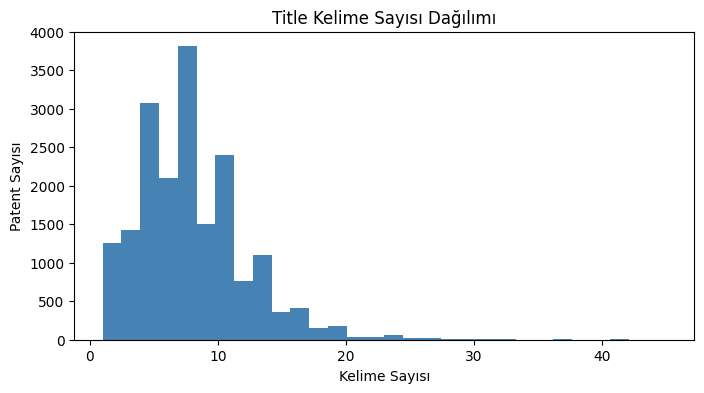

In [29]:
# Create a new column 'title_length_chars' to store the length (number of characters) of each title
df['title_length_chars'] = df['title'].str.len()

# Create a new column 'title_length_words' by splitting the title text into a list of words and counting them
df['title_length_words'] = df['title'].str.split().apply(len)

# Print a header for character length statistics
print("Karakter uzunluğu istatistikleri:")

# Display summary statistics (count, mean, std, min, max, etc.) for the character length column
print(df['title_length_chars'].describe())

# Print a header for word count statistics
print("\nKelime sayısı istatistikleri:")

# Display summary statistics for the word count column
print(df['title_length_words'].describe())

# --- Visualization ---

# Initialize a new figure with a specific size (8 inches wide, 4 inches tall)
plt.figure(figsize=(8,4))

# Create a histogram to visualize the distribution of word counts
# bins=30: Divides the data into 30 intervals
# color='steelblue': Sets the color of the bars
plt.hist(df['title_length_words'], bins=30, color='steelblue')

# Set the main title of the histogram
plt.title('Title Kelime Sayısı Dağılımı')

# Set the label for the x-axis (Word Count)
plt.xlabel('Kelime Sayısı')

# Set the label for the y-axis (Number of Patents)
plt.ylabel('Patent Sayısı')

# Render and display the plot
plt.show()

## Assignee (Company) and Inventor (Individual) with the Most Patents

En çok patenti olan ilk 10 Assignee:


assignee
Apple Inc.                                   447
株式会社半導体エネルギー研究所                              340
Google Llc                                   257
Samsung Electronics Co., Ltd.                252
Intel Corporation                            173
Cilag Gmbh International                     163
Interdigital Patent Holdings, Inc.           156
Samsung Display Co., Ltd.                    137
Align Technology, Inc.                       126
Semiconductor Energy Laboratory Co., Ltd.    117
Name: count, dtype: int64


En çok patenti olan ilk 10 Inventor:


inventor_author
径太 石塚                          31
義宏 胡本, 哲 川島                    30
舜平 山崎                          23
Esmael Hejazi Dinan            20
肇 木村                           16
Yilmaz İrem                    13
スティーヴン ライト，クレイグ, サヴァナ，ステファヌ    12
昇平 北田                          12
Hsin-Hsuan Huang               11
Roger P. Jackson               11
Name: count, dtype: int64

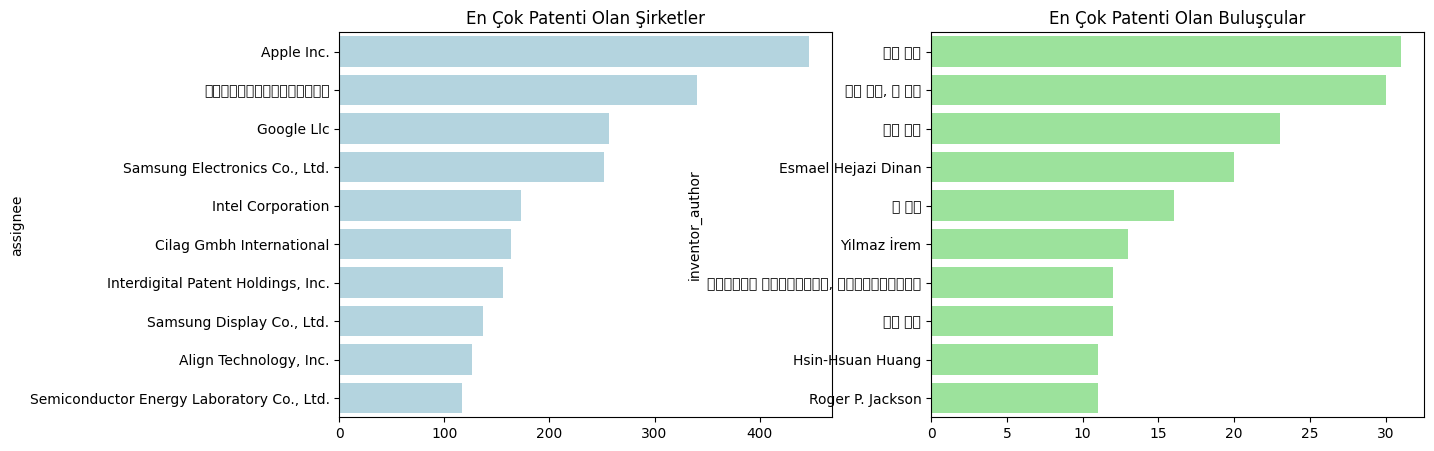

In [30]:
# Calculate the frequency of each 'assignee' (company), sort descending, and take the top 10
top_assignee = df['assignee'].value_counts().head(10)

# Calculate the frequency of each 'inventor_author', sort descending, and take the top 10
top_inventor = df['inventor_author'].value_counts().head(10)

# Print a header message for the top assignees
print("En çok patenti olan ilk 10 Assignee:")

# Display the top 10 assignees list
display(top_assignee)

# Print a header message for the top inventors
print("\nEn çok patenti olan ilk 10 Inventor:")

# Display the top 10 inventors list
display(top_inventor)

# --- Visualization ---

# Create a figure with 2 subplots side-by-side (1 row, 2 columns) with a total size of 14x5 inches
# 'fig' is the whole figure, 'axes' is an array containing the two individual subplots
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot the top assignees on the first subplot (axes[0])
# x=values (counts), y=index (names) creates a horizontal bar chart
sns.barplot(x=top_assignee.values, y=top_assignee.index, ax=axes[0], color='lightblue')

# Set the title for the first subplot
axes[0].set_title("En Çok Patenti Olan Şirketler")

# Plot the top inventors on the second subplot (axes[1]) using a different color
sns.barplot(x=top_inventor.values, y=top_inventor.index, ax=axes[1], color='lightgreen')

# Set the title for the second subplot
axes[1].set_title("En Çok Patenti Olan Buluşçular")

# Render and display the complete figure containing both plots
plt.show()

## Distribution by Technology Category

,count,percentage
technology_category,,
other,9976,53.18
hardware,3491,18.61
software,2454,13.08
automotive,699,3.73
telecom,639,3.41
energy,507,2.70
ai_ml,353,1.88
cloud,299,1.59
biotech,201,1.07


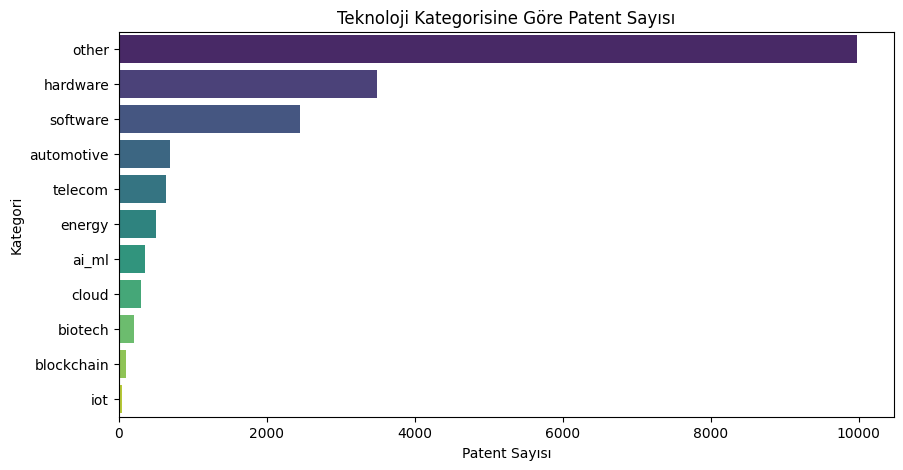

In [31]:
# Calculate the frequency (count) of each unique value in the 'technology_category' column
tech_counts = df['technology_category'].value_counts()

# Calculate the percentage of each category relative to the total dataset size, rounded to 2 decimal places
tech_pct = (tech_counts / len(df) * 100).round(2)

# Create a summary DataFrame to display both the raw counts and the percentages side-by-side
tech_summary = pd.DataFrame({
    'count': tech_counts,          # Column for the count of patents per category
    'percentage': tech_pct         # Column for the percentage share of each category
})

# Display the summary table
display(tech_summary)

# --- Visualization ---

# Create a figure (canvas) with a specific size (10 inches wide, 5 inches tall)
plt.figure(figsize=(10,5))

# Create a horizontal bar plot using Seaborn
# x=counts, y=categories names
# palette="viridis": Uses a color gradient map (from purple to yellow) for better visuals
sns.barplot(x=tech_counts.values, y=tech_counts.index, palette="viridis")

# Set the main title of the chart
plt.title("Teknoloji Kategorisine Göre Patent Sayısı")

# Set the label for the x-axis
plt.xlabel("Patent Sayısı")

# Set the label for the y-axis
plt.ylabel("Kategori")

# Render and display the plot
plt.show()  

## Most Frequently Used Words (Title Analysis)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,count
0,method,3680
1,system,3345
2,methods,3047
3,device,3001
4,systems,2110
5,apparatus,1590
6,using,1057
7,display,962
8,devices,959
9,based,886


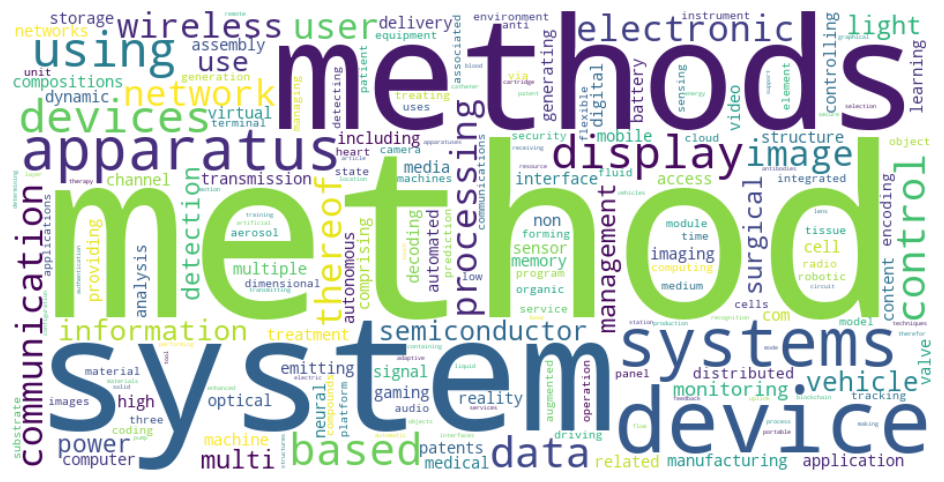

In [32]:
# Import 'Counter' to easily count frequency of elements in a list
from collections import Counter

# Import 're' (Regular Expressions) for pattern matching and text cleaning
import re

# Import stopwords list from NLTK (common words like 'the', 'is', 'and' that we want to ignore)
from nltk.corpus import stopwords

# Import the Natural Language Toolkit (NLTK) library
import nltk

# Download the standard list of English stopwords (required to run this for the first time)
nltk.download('stopwords')

# Create a set of English stopwords for fast lookup (sets are faster than lists)
stop_words = set(stopwords.words('english'))

# --- Text Processing Loop ---

# Initialize an empty list to store every single valid word found in all titles
all_words = []

# Loop through each title in the dataframe
for title in df['title']:
    # Check if the title is a string (to avoid errors with missing/NaN values)
    if isinstance(title, str):
        # 1. Convert to lowercase.
        # 2. Use regex to find words with 2 or more letters (removing numbers and punctuation).
        words = re.findall(r'\b[a-zA-Z]{2,}\b', title.lower())
        
        # Filter out the stopwords (keep word 'w' only if it is NOT in 'stop_words')
        words = [w for w in words if w not in stop_words]
        
        # Add the cleaned words from this title to our main list
        all_words.extend(words)

# --- Frequency Analysis ---

# Count how many times each word appears in the entire 'all_words' list
word_freq = Counter(all_words)

# Get the top 20 most frequent words as a list of tuples like [('system', 500), ('device', 300)]
most_common_words = word_freq.most_common(20)

# --- Tabular Display ---

# Import pandas to format the results nicely
import pandas as pd

# Convert the list of tuples into a DataFrame
common_words_df = pd.DataFrame(most_common_words, columns=['word','count'])

# Display the table of most common words
display(common_words_df)

# --- Visualization (Word Cloud) ---

# Import the WordCloud library
from wordcloud import WordCloud

# Create a WordCloud object with specific dimensions and white background
# .generate_from_frequencies() uses our pre-calculated count (word_freq) to size the words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Create a figure for the plot
plt.figure(figsize=(15,6))

# Display the generated image; interpolation='bilinear' makes the text edges look smoother
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the x and y axes (numbers and lines) for a cleaner look
plt.axis('off')

# Render the final visualization
plt.show()

## Category Distribution of the 5 Most Active Companies

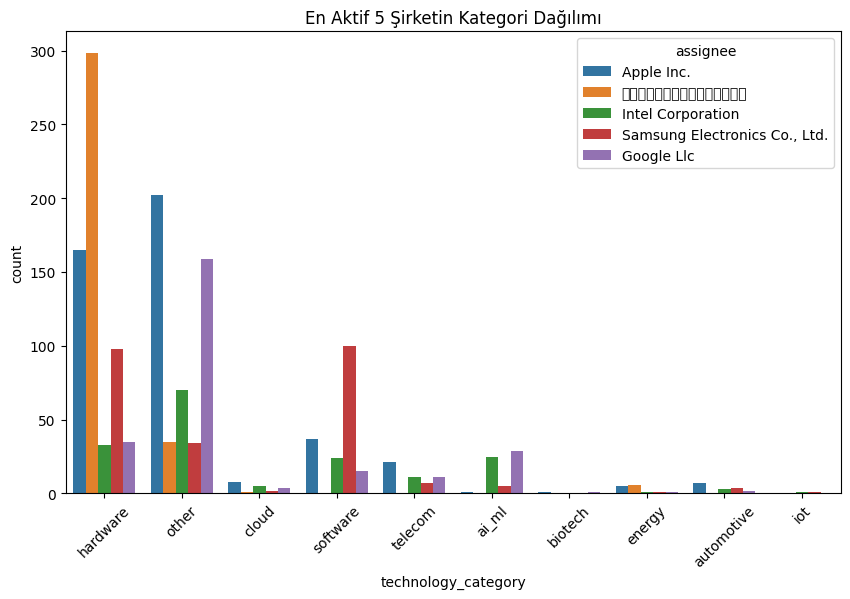

In [33]:
# Calculate the frequency of each assignee, take the top 5, and extract their names (indices)
top_assignees = df['assignee'].value_counts().head(5).index

# Filter the main DataFrame to create a new subset containing ONLY records from these top 5 companies
# .isin() checks if the assignee is present in our 'top_assignees' list
df_top_assignees = df[df['assignee'].isin(top_assignees)]

# Initialize a figure with specific dimensions (10x6 inches)
plt.figure(figsize=(10,6))

# Create a count plot (bar chart)
# x='technology_category': Group data by technology on the X-axis
# hue='assignee': Break down each category bar by company (assignee) using different colors. This creates a "grouped" bar chart.
sns.countplot(data=df_top_assignees, x='technology_category', hue='assignee')

# Set the title of the chart
plt.title("En Aktif 5 Şirketin Kategori Dağılımı")

# Rotate x-axis labels by 45 degrees to prevent overlapping text, making category names readable
plt.xticks(rotation=45)

# Render and display the final plot
plt.show()

## Category Trend Chart by Year

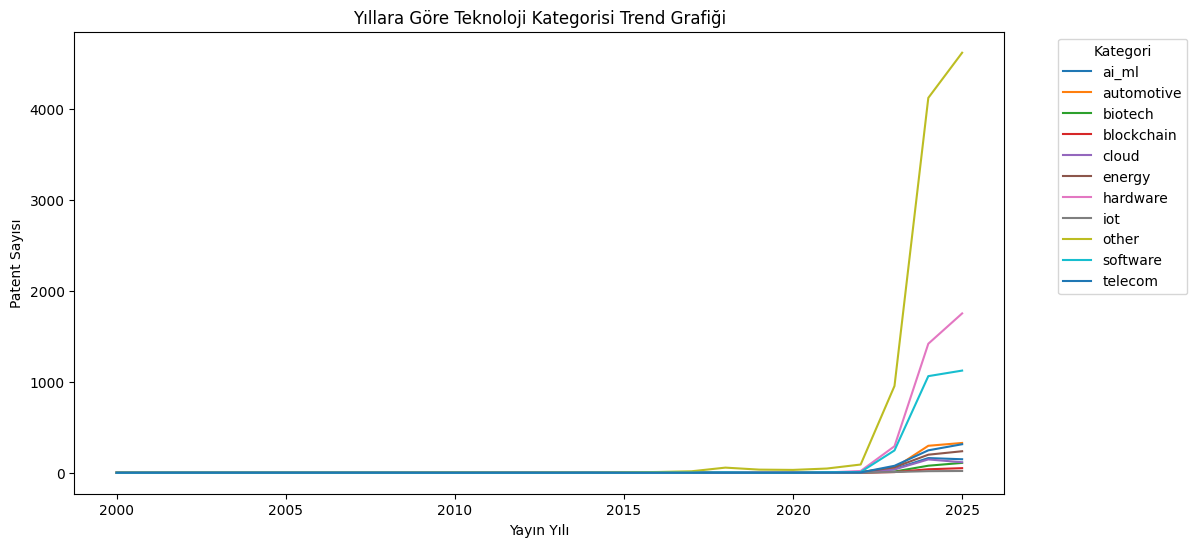

In [34]:
# Create a pivot table to restructure the data for trend analysis
# index='publication_year': Rows will represent years
# columns='technology_category': Columns will represent different technology categories
# aggfunc='size': Counts the number of patents for each year-category pair
# fill_value=0: Fills missing data points with 0 instead of NaN (essential for plotting lines)
pivot = df.pivot_table(index='publication_year', columns='technology_category', aggfunc='size', fill_value=0)

# Plot the pivot table directly using Pandas built-in plotting (defaults to a line chart)
# figsize=(12,6): Sets the figure size to 12 inches wide and 6 inches tall
pivot.plot(figsize=(12,6))

# Set the main title of the chart
plt.title("Yıllara Göre Teknoloji Kategorisi Trend Grafiği")

# Set the x-axis label
plt.xlabel("Yayın Yılı")

# Set the y-axis label
plt.ylabel("Patent Sayısı")

# Configure the legend
# title='Kategori': Title of the legend box
# bbox_to_anchor=(1.05, 1): Moves the legend outside the plot area (to the right) so it doesn't cover the lines
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1))

# Render and display the plot
plt.show()

## Assignee vs. Category Heatmap

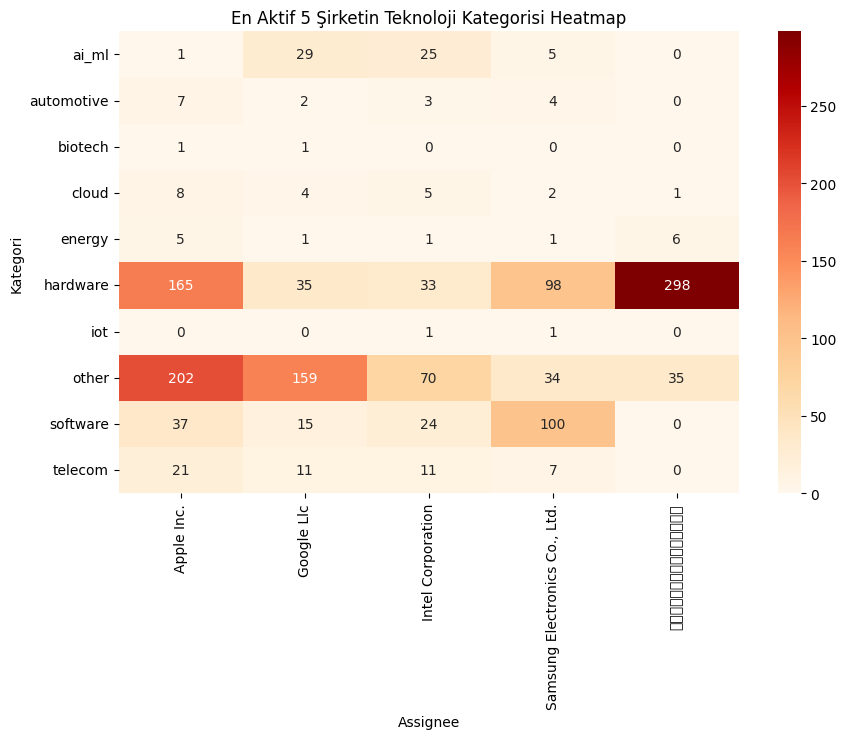

In [35]:
# Identify the top 5 assignees (companies) with the most patents
# .index: Extracts just the names of the companies
top_assignees = df['assignee'].value_counts().head(5).index

# Filter the main DataFrame to keep ONLY records belonging to these top 5 companies
df_top = df[df['assignee'].isin(top_assignees)]

# Create a pivot table (matrix) specifically for the heatmap
# index='technology_category': Rows will be technology categories
# columns='assignee': Columns will be the company names
# aggfunc='size': Count the number of patents in each intersection
# fill_value=0: Replace missing values with 0
pivot2 = df_top.pivot_table(index='technology_category', columns='assignee', aggfunc='size', fill_value=0)

# --- Visualization ---

# Initialize the figure with size 10x6 inches
plt.figure(figsize=(10,6))

# Create the Heatmap using Seaborn
# data=pivot2: The matrix data source we created above
# cmap="OrRd": Color map (Orange to Red); darker red indicates higher numbers (more patents)
# annot=True: Write the actual data values (numbers) inside the cells
# fmt="d": Format the numbers as integers (d=decimal integer) to avoid scientific notation (like 1.2e2)
sns.heatmap(pivot2, cmap="OrRd", annot=True, fmt="d")

# Set the chart title
plt.title("En Aktif 5 Şirketin Teknoloji Kategorisi Heatmap")

# Set axis labels
plt.xlabel("Assignee")
plt.ylabel("Kategori")

# Display the plot
plt.show()

## Category vs. Year Heatmap

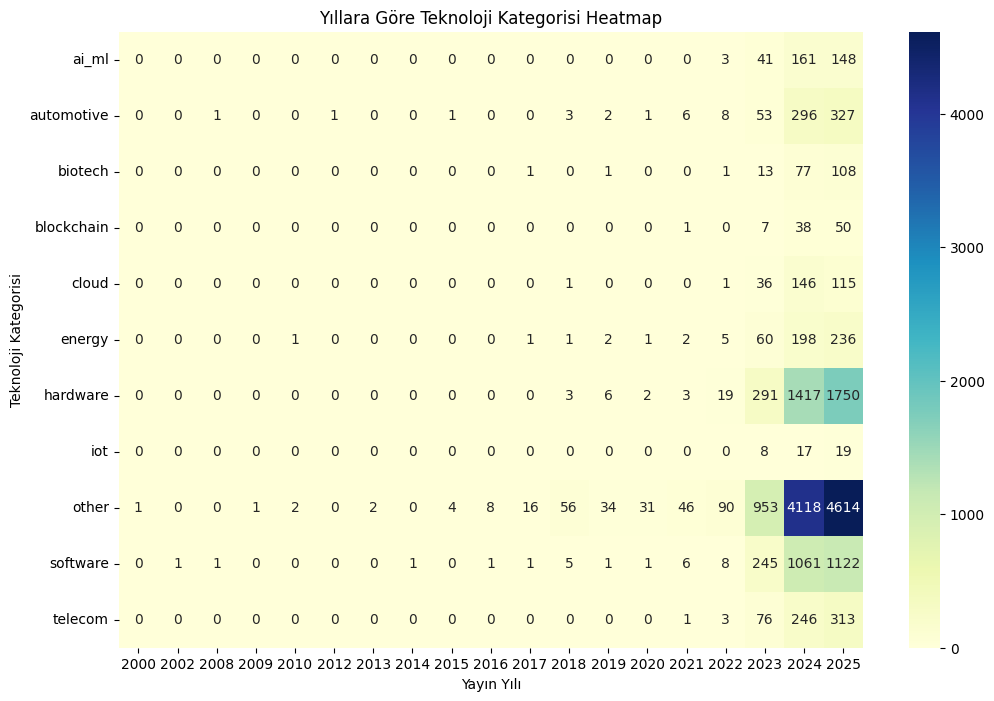

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to organize the data into a matrix format suitable for a heatmap
# index='technology_category': Sets the rows to be the technology categories
# columns='publication_year': Sets the columns to be the publication years
# aggfunc='size': Counts the number of patents in each cell (intersection of category and year)
# fill_value=0: Fills empty cells with 0 instead of NaN to keep the chart clean
pivot = df.pivot_table(index='technology_category', columns='publication_year', aggfunc='size', fill_value=0)

# Initialize the figure with a larger size (12x8 inches) to accommodate multiple years and categories
plt.figure(figsize=(12,8))

# Create the Heatmap using Seaborn
# cmap="YlGnBu": Sets the Color Map to "Yellow-Green-Blue" (Lighter colors = low count, Darker Blue = high count)
# annot=True: Displays the actual numbers inside the cells
# fmt="d": Formats the numbers as integers ("decimal") so they don't show up as scientific notation (e.g., 1.2e3)
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")

# Set the main title of the chart
plt.title("Yıllara Göre Teknoloji Kategorisi Heatmap")

# Set the label for the x-axis
plt.xlabel("Yayın Yılı")

# Set the label for the y-axis
plt.ylabel("Teknoloji Kategorisi")

# Render and display the plot
plt.show()